# Projekt 1 - Dane pobrano z water_potability.csv


## Zad2-1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

try:
    df_water = pd.read_csv('water_potability.csv')
    print("wczytano dane")
except FileNotFoundError:
    print("nie wczytano danych")

wczytano dane


## Zad2-2

In [3]:
display(df_water.head())
print(df_water.info())
display(df_water.describe())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.213302,189.681916,21057.662214,8.114224,230.507961,426.226462,9.954290,57.316487,3.100232,1
1,6.272011,188.020564,25394.740904,8.153630,383.472420,358.882079,13.810410,72.154087,2.741828,0
2,7.525316,172.133603,11166.376305,7.899896,326.518080,420.570021,8.614537,72.367363,4.332616,0
3,7.658395,217.139317,18288.211026,7.528133,294.005453,400.717449,11.138576,72.966391,4.153343,0
4,5.634275,209.385848,24974.919772,7.495392,314.950949,531.406569,13.023235,76.684441,1.775441,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               4726 non-null   float64
 1   Hardness         5000 non-null   float64
 2   Solids           5000 non-null   float64
 3   Chloramines      5000 non-null   float64
 4   Sulfate          4747 non-null   float64
 5   Conductivity     5000 non-null   float64
 6   Organic_carbon   5000 non-null   float64
 7   Trihalomethanes  4780 non-null   float64
 8   Turbidity        5000 non-null   float64
 9   Potability       5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB
None


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,4726.000000,5000.000000,5000.000000,5000.000000,4747.000000,5000.000000,5000.000000,4780.000000,5000.000000,5000.000000
mean,6.984380,199.980204,19948.861381,7.059326,331.188155,420.594678,14.018669,69.488975,3.992224,0.147800
std,0.697679,40.506634,5992.878200,1.206700,59.252676,81.193878,3.996055,20.126654,0.995626,0.354937
min,4.446111,50.000000,1000.000000,2.559890,118.175454,142.850929,0.500000,5.000000,0.500000,0.000000
25%,6.516807,173.534032,15916.063970,6.231954,291.853816,365.527477,11.313651,56.204461,3.329062,0.000000
50%,6.997921,199.197768,19807.366440,7.056188,331.276282,420.970200,13.992790,69.337944,3.994686,0.000000
75%,7.433408,226.891943,23974.756711,7.876622,370.094904,475.741736,16.701769,82.958951,4.664020,0.000000
max,9.417832,361.032962,44907.448382,10.840292,543.381767,714.600760,30.000000,156.538415,9.007235,1.000000


## Zad2-3

,Missing Values,Percentage
ph,274,5.48
Sulfate,253,5.06
Trihalomethanes,220,4.40


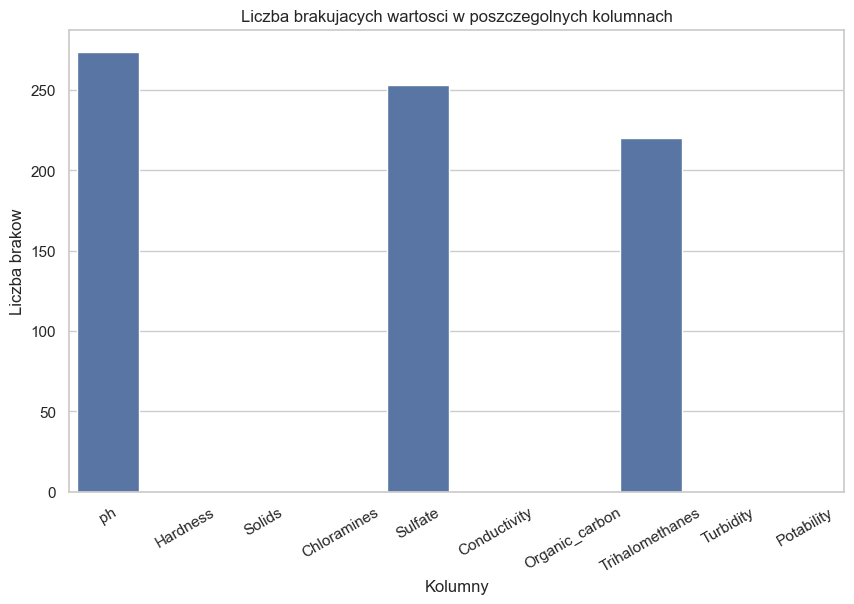

In [4]:
missing_values = df_water.isnull().sum()
missing_percentage = (missing_values / len(df_water)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_data[missing_data['Missing Values'] > 0])

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Liczba brakujacych wartosci w poszczegolnych kolumnach')
plt.xlabel('Kolumny')
plt.ylabel('Liczba brakow')
plt.xticks(rotation=30)
plt.show()

## Zad2-4

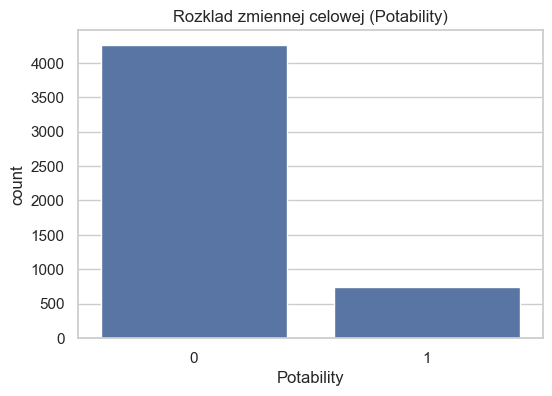

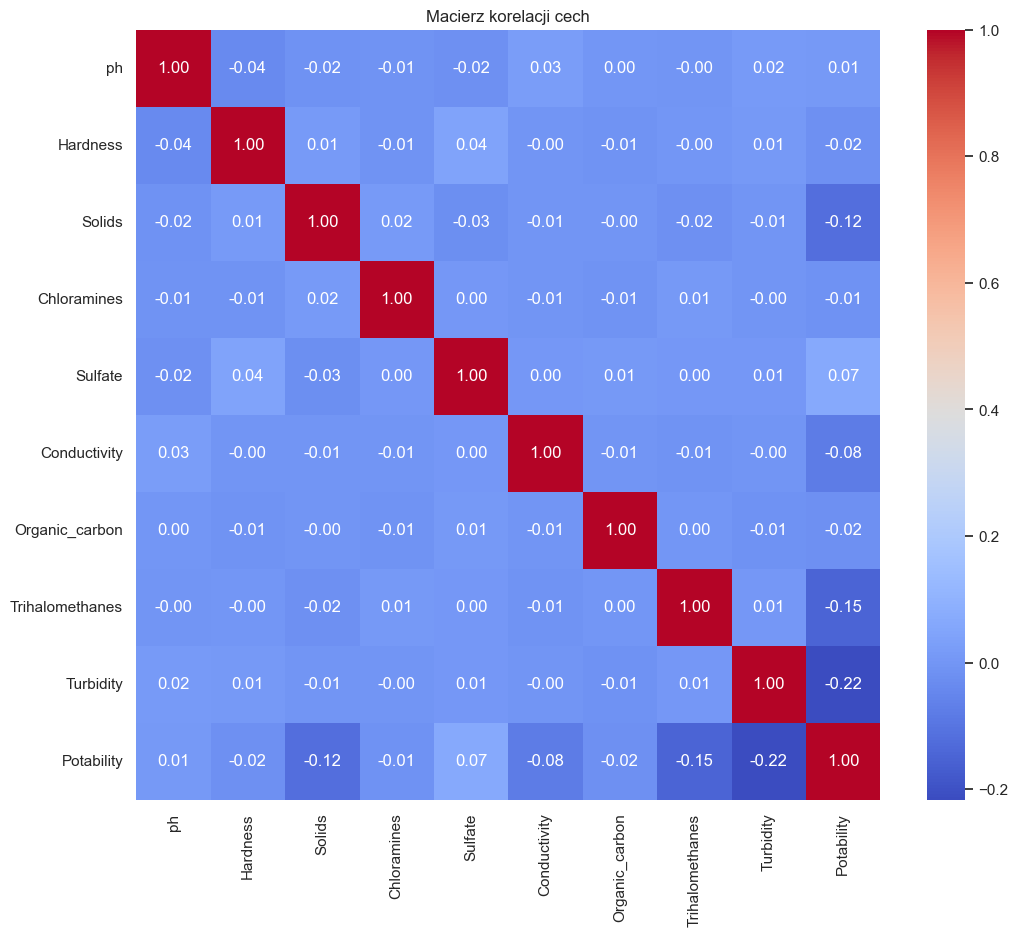

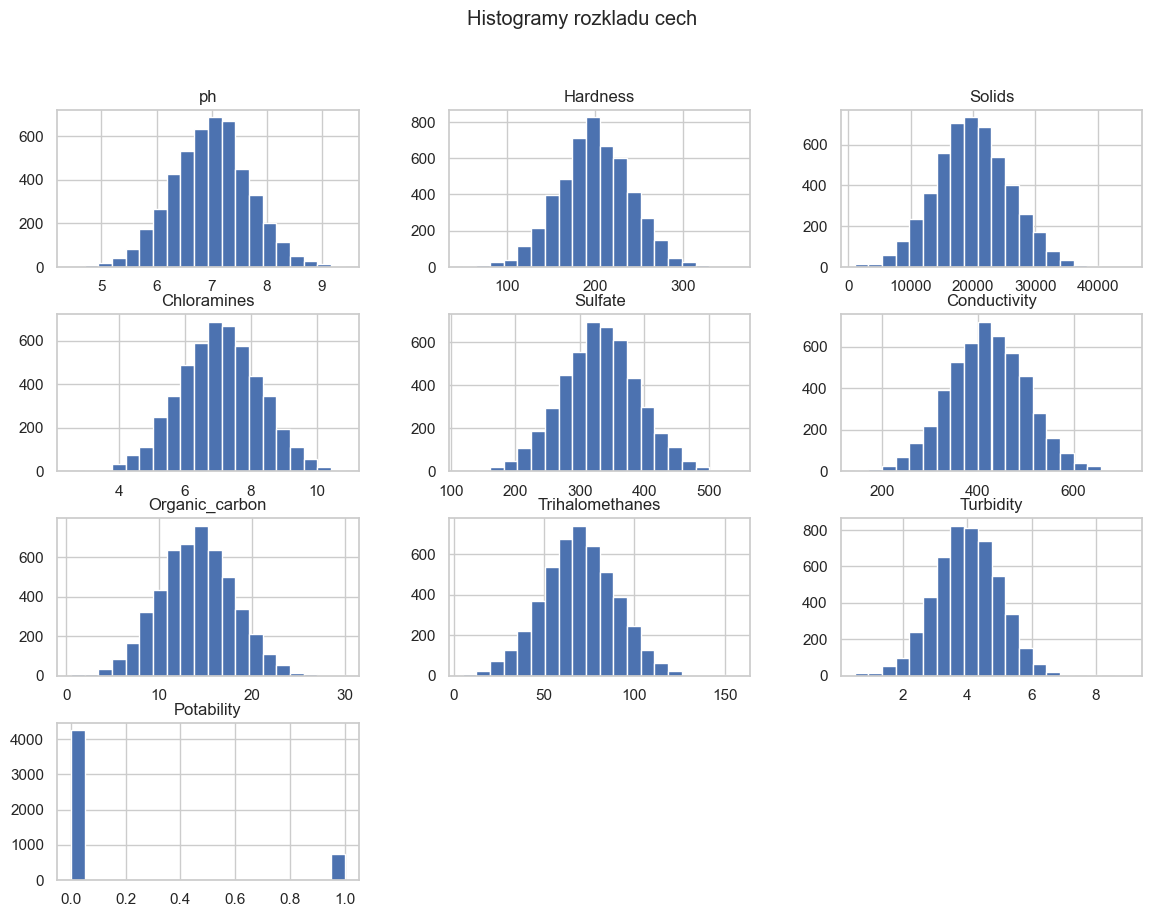

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df_water)
plt.title('Rozklad zmiennej celowej (Potability)')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_water.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji cech')
plt.show()

df_water.hist(figsize=(14, 10), bins=20)
plt.suptitle('Histogramy rozkladu cech')
plt.show()

## Zad3-1

In [6]:
df_water['ph'] = df_water['ph'].fillna(df_water['ph'].median())
df_water['Sulfate'] = df_water['Sulfate'].fillna(df_water['Sulfate'].median())
df_water['Trihalomethanes'] = df_water['Trihalomethanes'].fillna(df_water['Trihalomethanes'].median())

print("Liczba brakow po imputacji:")
print(df_water.isnull().sum())

Liczba brakow po imputacji:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


## Zad3-2/4

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_water.drop('Potability', axis=1)
y = df_water['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Kształt danych treningowych X:", X_train_scaled.shape)
print("Kształt danych testowych X:", X_test_scaled.shape)

Kształt danych treningowych X: (4000, 9)
Kształt danych testowych X: (1000, 9)


## Zad4/5

**Uzasadnienie**

Do tego projektu wybraliśmy zadanie klasyfikacji, ponieważ natura naszej zmiennej celowej (Potability) jest dyskretna i binarna.
Klasyfikacja służy do przewidywania przynależności do grupy. W naszym przypadku woda może należeć tylko do jednej z dwóch grup: "Zdatna do picia" (1) lub "Niezdatna do picia" (0). Nie ma wartości pośrednich (np. "trochę zdatna").

--- Regresja Logistyczna ---
Accuracy: 0.8500
F1-Score: 0.0741

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       852
           1       0.43      0.04      0.07       148

    accuracy                           0.85      1000
   macro avg       0.64      0.52      0.50      1000
weighted avg       0.79      0.85      0.79      1000



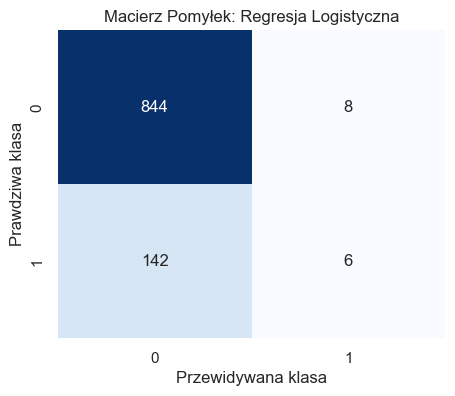

--- Drzewo Decyzyjne ---
Accuracy: 0.7930
F1-Score: 0.3257

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       852
           1       0.31      0.34      0.33       148

    accuracy                           0.79      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.80      0.79      0.80      1000



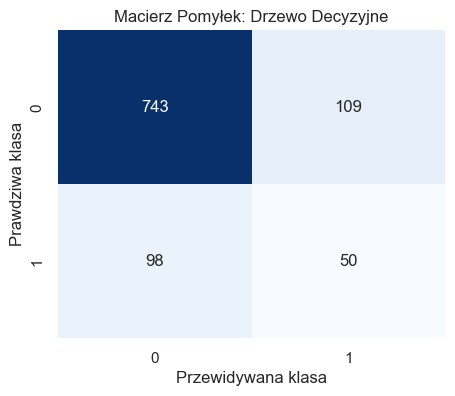

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Regresja logistyczna
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
# Drzewo decyzyjne
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)
y_pred_tree = tree_clf.predict(X_test_scaled)

def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    #raporty
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("\nRaport klasyfikacji:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)


    #macierz
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Macierz Pomyłek: {name}')
    plt.xlabel('Przewidywana klasa')
    plt.ylabel('Prawdziwa klasa')
    plt.show()

evaluate_model("Regresja Logistyczna", y_test, y_pred_log)
evaluate_model("Drzewo Decyzyjne", y_test, y_pred_tree)

C:\Users\kacpe\AppData\Local\Temp\ipykernel_9416\491306699.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ważność', y='Cecha', data=feature_importances, palette='viridis')


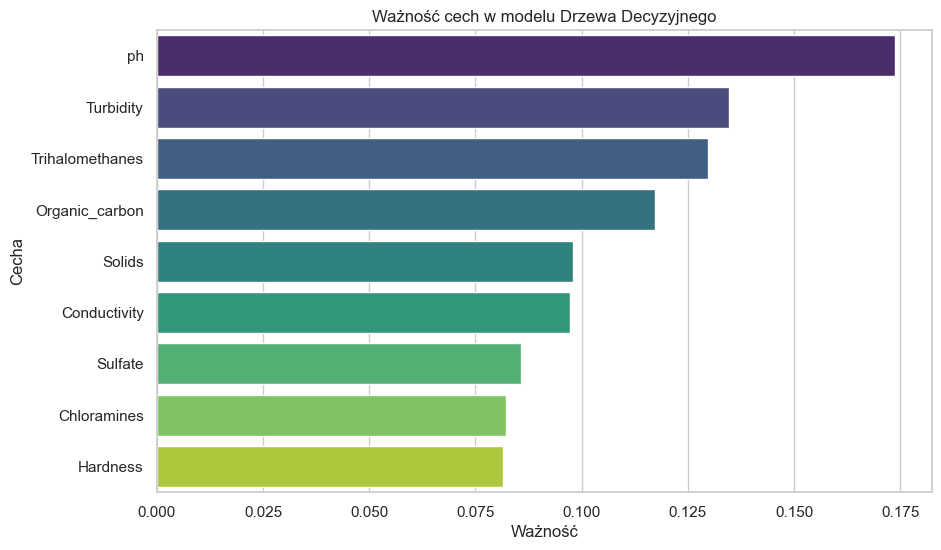

In [16]:
importances = tree_clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Cecha': feature_names, 'Ważność': importances})
feature_importances = feature_importances.sort_values(by='Ważność', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Ważność', y='Cecha', data=feature_importances, palette='viridis')
plt.title('Ważność cech w modelu Drzewa Decyzyjnego')
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.show()

**Porównanie Modeli (W oparciu o uzyskane wyniki):**
1.  **Regresja Logistyczna:** Uzyskała bardzo wysokie **Accuracy (ok. 85%)**, ale jest to wynik mylący. Model nauczył się po prostu częściej zgadywać klasę dominującą (0 - woda niezdatna). Świadczy o tym bardzo niski **F1-Score (ok. 0.07)** oraz znikoma Czułość (Recall) dla wody zdatnej. Model ten jest praktycznie bezużyteczny w wykrywaniu wody pitnej.
2.  **Drzewo Decyzyjne:** Uzyskało niższe **Accuracy (ok. 79%)**, ale znacznie wyższy **F1-Score (ok. 0.33)**. Model ten podjął realną próbę klasyfikacji (wykrył ponad 30% wody pitnej, w porównaniu do 4% w regresji). Mimo większej liczby błędów ogólnych (false positives), jest to model bardziej wartościowy analitycznie, ponieważ nie ignoruje mniejszej klasy.

**Ważność Cech:**
Z analizy wykresu ważności cech wynika, że parametry takie jak `ph`, `Sulfate` czy `Hardness` często odgrywają kluczową rolę, ale żadna pojedyncza cecha nie dominuje w 100%. Decyzja o zdatności jest wypadkową wielu parametrów.

**Wniosek Końcowy:**
Ze względu na nierównowagę klas (znacząca przewaga wody niezdatnej w zbiorze testowym), metryka *Accuracy* faworyzowała model "leniwy" (Regresja Logistyczna). Metryka *F1-Score* poprawnie wskazała **Drzewo Decyzyjne** jako model lepiej radzący sobie ze strukturą danych i wykrywaniem wody pitnej, mimo niższego wyniku ogólnej dokładności. Aby uzyskać jeszcze lepsze wyniki, należałoby zastosować techniki balansowania danych (np. SMOTE) lub bardziej zaawansowane modele ensemblingu (np. Random Forest).